In [1]:
import pandas as pd
dataset_sample=pd.read_csv("shopee_sample_data.csv")
dataset_sample.head()

,price_ori,delivery,item_category_detail,specification,title,w_date,link_ori,item_rating,seller_name,idElastic,...,idHash,seller_details,location,total_rating,id,pict_link,total_sold,favorite,timestamp,desc
0,29.16,Shipping Pre-Order (ships in 11 days) Shipping...,Shopee | Women's Clothing | Skirts,Category Shopee Women's Clothing Skirts Brand ...,Alice's new elegant style ultra-fairy French d...,20201123.0,https://shopee.com.my/Alice's-new-elegant-styl...,NaN,8ysl9a1301,6e1e3d7b51a4c1099c368114ab91a88a,...,97dcb011fc73ec4b3c31eed989ae0094,8ysl9a1301 Active 3 hours ago chat now view sh...,"Lubok China, 000001 Melaka",0,6.445109e+09,https://cf.shopee.com.my/file/63256421fb228665...,NaN,80,1.606064e+12,Promotions: Summer's new elegant style ins sup...
1,57.78,Shipping Free shipping Free shipping for order...,Shopee | Women's Clothing | Dresses | Midi Dre...,Category Shopee Women's Clothing Dresses Midi ...,👍👍Korean Vintage Style Square Neck Slim Midi D...,20201123.0,https://shopee.com.my/👍👍Korean-Vintage-Style-S...,NaN,showcasemywardore,a4248a77a54045ea69f18cb87ada6fb2,...,5b870a335a74b055c9a24083da6e925a,showcasemywardore Active 3 hours ago chat now ...,"KLCC, 50088 Kuala Lumpur",1,5.445225e+09,https://cf.shopee.com.my/file/559058f73c771491...,NaN,61,1.606064e+12,- Color: Multicolor\n\n- Material: Polyester\n...
2,82.00,Shipping Free shipping Shipping from overseas ...,Shopee | Women's Clothing | Dresses | Maxi Dre...,Category Shopee Women's Clothing Dresses Maxi ...,ZANZEA Women Sleeveless Drawstring Pleated Swi...,20201123.0,https://shopee.com.my/ZANZEA-Women-Sleeveless-...,5.0,zanzea.os,8ef1159741c3ad608ab376a1def1a8d5,...,fb6977c44fd154310f800c3155594121,zanzea.os Active 37 minutes ago chat now view ...,Mainland China,3,4.843064e+09,https://cf.shopee.com.my/file/5ce472482e927cf4...,3,24,1.606064e+12,Item Type:Dress\nMaterial: Cotton \nColors:Gre...
3,115.00,"Shipping Free shipping Shipping to KL City, Ku...",Shopee | Women's Clothing | Dresses | Maxi Dre...,Category Shopee Women's Clothing Dresses Maxi ...,AIR SPACE V-Neck Ruffle Sleeve Tassel Side Tie...,20201123.0,https://shopee.com.my/AIR-SPACE-V-Neck-Ruffle-...,NaN,airspacemy.os,e5f6337f3faa4badad794fb211b35c61,...,5c935733c665ede79faa95d00e146d11,airspacemy.os Active 14 minutes ago chat now v...,"Kuala Langat, 42500 Selangor",0,6.245303e+09,https://cf.shopee.com.my/file/fdab91ad3c366064...,NaN,28,1.606064e+12,Welcome to Air Space Malaysia Official where w...
4,40.90,Shipping Free shipping Shipping from overseas ...,Shopee | Women's Clothing | Dresses | Maxi Dre...,Category Shopee Women's Clothing Dresses Maxi ...,ZANZEA Women Crew Neck Long Sleeve Ethnic Vint...,20201123.0,https://shopee.com.my/ZANZEA-Women-Crew-Neck-L...,4.8,zanzea.os,3dbb5a357043464af36d6591d215a19c,...,e806e77f75c6bc43ad52adf457dd7004,zanzea.os Active 37 minutes ago chat now view ...,Mainland China,123,3.430108e+09,https://cf.shopee.com.my/file/0af4b832a74478f1...,242,744,1.606064e+12,Material:Cotton\nPackage?included:1Dress\nColo...


In [2]:
def isfloat(value):
    try:
        float(value)  # Try to convert the value to float
        return True   # If successful, it's a float
    except ValueError:  # If it fails, it's not a float
        return False
dataset_sample.iloc[dataset_sample[dataset_sample['item_category_detail'].apply(lambda x: isfloat(x)) == True].index]
dataset_sample.dropna(thresh=10,inplace=True,axis=0)
dataset_sample['item_category_detail'] = dataset_sample['item_category_detail'].apply(lambda x: x.lower())
dataset_sample['item_category_detail'] = dataset_sample['item_category_detail'].apply(lambda x: x.split('|'))
dataset_sample['item_category_detail'] = dataset_sample['item_category_detail'].apply(lambda x: [st.strip() for st in x])


In [3]:
dataset_sample['Type of product']=dataset_sample["item_category_detail"].apply(lambda x: x[1])
dataset_sample['Type of product_2']=dataset_sample["item_category_detail"].apply(lambda x : x[2] if len(x)>3 else x[1])
dataset_sample.loc[:,['Type of product','Type of product_2']]


,Type of product,Type of product_2
0,women's clothing,women's clothing
1,women's clothing,dresses
2,women's clothing,dresses
3,women's clothing,dresses
4,women's clothing,dresses
...,...,...
42420,women's clothing,traditional wear
42421,women's clothing,women's clothing
42422,mobile & gadgets,cases & covers
42423,mobile & gadgets,cases & covers


In [4]:
import pprint
pd.reset_option('display.max_colwidth')
dataset_sample[dataset_sample['Type of product']=='baby & toys']['Type of product_2'].unique()


array(['baby clothing', 'baby gear', 'feeding & nursing',
       'bath & toiletries', 'formula & food', 'boys fashion',
       'toys & education', 'nursery', 'girls fashion',
       'diapers & potties', 'kids fashion accessories & bags',
       'baby & toys', 'baby & toddler play', 'kids sports & outdoor play',
       'kids health & skincare', 'baby safety', 'maternity care'],
      dtype=object)

In [5]:
fashion_names=["women's clothing", "men's clothing", 'muslim fashion',
               'baby & toys', 'watches',
               "men's bags & wallets",
               "women's bags", 'sports & outdoor', 'fashion accessories'
               , "men's shoes", "women's shoes", 'women clothes']
fashion_names_2=['baby clothing', 'boys fashion', 'girls fashion', 'kids fashion accessories & bags']



In [6]:
new_set=dataset_sample[(dataset_sample['Type of product'].isin(fashion_names)) | (dataset_sample['Type of product_2'].isin(fashion_names_2))]

In [7]:
new_set['item_category_detail'].apply(lambda x: x[1]).unique()

array(["women's clothing", "men's clothing", 'muslim fashion',
       'baby & toys', 'watches', "men's bags & wallets", "women's bags",
       'sports & outdoor', 'fashion accessories', "men's shoes",
       "women's shoes", 'women clothes'], dtype=object)

In [8]:
new_set[new_set['item_category_detail'].apply(lambda x: (('sports & outdoor' in x) or('baby & toys' in x)))]['Type of product_2'].unique()

array(['baby clothing', 'baby gear', 'feeding & nursing',
       'bath & toiletries', 'formula & food', 'boys fashion',
       'toys & education', 'nursery', 'girls fashion',
       'diapers & potties', 'kids fashion accessories & bags',
       'baby & toys', 'baby & toddler play', 'kids sports & outdoor play',
       'outdoor & adventure', 'exercise & fitness equipment',
       'sports & outdoor', 'badminton', 'cycling & skates',
       'kids health & skincare', 'baby safety', "men's sports shoes",
       'acrobatic & martial arts', 'basketball', 'running',
       'racket sports', 'maternity care', 'stick & ball games', 'fishing',
       'water sports', 'performance wear', 'football & futsal',
       "women's sports shoes"], dtype=object)

In [9]:
list_to_drop=['baby gear', 'feeding & nursing',
       'bath & toiletries', 'formula & food',
       'toys & education', 'nursery',
       'diapers & potties',
       'baby & toys', 'baby & toddler play', 'kids sports & outdoor play',
       'outdoor & adventure', 'exercise & fitness equipment',
       'sports & outdoor', 'badminton', 'cycling & skates',
       'kids health & skincare', 'baby safety',
       'acrobatic & martial arts', 'basketball', 'running',
       'racket sports', 'maternity care', 'stick & ball games', 'fishing',
       'water sports', 'performance wear', 'football & futsal']

new_set=new_set[new_set['Type of product_2'].apply(lambda x: x not in list_to_drop)]

In [10]:
new_set.reset_index(inplace=True)
new_set.drop('index',axis=1,inplace=True)

In [11]:
new_set.describe()

,price_ori,w_date,item_rating,price_actual,id,timestamp
count,17756.000000,1.777500e+04,14975.000000,17770.000000,1.777500e+04,1.777500e+04
mean,71.900686,2.020115e+07,4.838624,49.598278,4.003205e+09,1.606315e+12
std,254.833548,3.600125e+01,0.329221,155.445781,2.240457e+09,3.041915e+08
min,0.100000,2.020112e+07,1.000000,0.090000,1.675570e+05,1.606064e+12
25%,15.980000,2.020112e+07,4.800000,11.505000,2.100148e+09,1.606064e+12
50%,34.995000,2.020112e+07,4.900000,25.000000,3.840939e+09,1.606151e+12
75%,68.000000,2.020120e+07,5.000000,48.600000,6.001580e+09,1.606756e+12
max,16258.000000,2.020120e+07,5.000000,9470.000000,9.600688e+09,1.606842e+12


In [12]:
new_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17775 entries, 0 to 17774
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price_ori             17756 non-null  float64
 1   delivery              17775 non-null  object 
 2   item_category_detail  17775 non-null  object 
 3   specification         17775 non-null  object 
 4   title                 17775 non-null  object 
 5   w_date                17775 non-null  float64
 6   link_ori              17775 non-null  object 
 7   item_rating           14975 non-null  float64
 8   seller_name           17775 non-null  object 
 9   idElastic             17775 non-null  object 
 10  price_actual          17770 non-null  float64
 11  sitename              17775 non-null  object 
 12  idHash                17775 non-null  object 
 13  seller_details        17654 non-null  object 
 14  location              11213 non-null  object 
 15  total_rating       

In [13]:
new_set.columns

Index(['price_ori', 'delivery', 'item_category_detail', 'specification',
       'title', 'w_date', 'link_ori', 'item_rating', 'seller_name',
       'idElastic', 'price_actual', 'sitename', 'idHash', 'seller_details',
       'location', 'total_rating', 'id', 'pict_link', 'total_sold', 'favorite',
       'timestamp', 'desc', 'Type of product', 'Type of product_2'],
      dtype='object')

In [14]:
columns_to_drop=['link_ori', 'seller_name','sitename',
       'idElastic', 'idHash', 'seller_details', 'id', 'pict_link', 'total_sold']

In [15]:
new_set.drop(columns_to_drop,axis=1,inplace=True)

In [16]:
new_set

,price_ori,delivery,item_category_detail,specification,title,w_date,item_rating,price_actual,location,total_rating,favorite,timestamp,desc,Type of product,Type of product_2
0,29.16,Shipping Pre-Order (ships in 11 days) Shipping...,"[shopee, women's clothing, skirts]",Category Shopee Women's Clothing Skirts Brand ...,Alice's new elegant style ultra-fairy French d...,20201123.0,NaN,29.16,"Lubok China, 000001 Melaka",0,80,1.606064e+12,Promotions: Summer's new elegant style ins sup...,women's clothing,women's clothing
1,57.78,Shipping Free shipping Free shipping for order...,"[shopee, women's clothing, dresses, midi dresses]",Category Shopee Women's Clothing Dresses Midi ...,👍👍Korean Vintage Style Square Neck Slim Midi D...,20201123.0,NaN,57.78,"KLCC, 50088 Kuala Lumpur",1,61,1.606064e+12,- Color: Multicolor\n\n- Material: Polyester\n...,women's clothing,dresses
2,82.00,Shipping Free shipping Shipping from overseas ...,"[shopee, women's clothing, dresses, maxi dresses]",Category Shopee Women's Clothing Dresses Maxi ...,ZANZEA Women Sleeveless Drawstring Pleated Swi...,20201123.0,5.0,39.36,Mainland China,3,24,1.606064e+12,Item Type:Dress\nMaterial: Cotton \nColors:Gre...,women's clothing,dresses
3,115.00,"Shipping Free shipping Shipping to KL City, Ku...","[shopee, women's clothing, dresses, maxi dresses]",Category Shopee Women's Clothing Dresses Maxi ...,AIR SPACE V-Neck Ruffle Sleeve Tassel Side Tie...,20201123.0,NaN,115.00,"Kuala Langat, 42500 Selangor",0,28,1.606064e+12,Welcome to Air Space Malaysia Official where w...,women's clothing,dresses
4,40.90,Shipping Free shipping Shipping from overseas ...,"[shopee, women's clothing, dresses, maxi dresses]",Category Shopee Women's Clothing Dresses Maxi ...,ZANZEA Women Crew Neck Long Sleeve Ethnic Vint...,20201123.0,4.8,40.90,Mainland China,123,744,1.606064e+12,Material:Cotton\nPackage?included:1Dress\nColo...,women's clothing,dresses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17770,6.00,"Shipping Free shipping Shipping to KL City, Ku...","[shopee, women's clothing, tops]",Category Shopee Women's Clothing Tops Brand No...,[Live Only] KNIT BY MEMZ | Shopee Malaysia,20201202.0,5.0,6.00,"Shah Alam, 40200 Selangor",491,7,1.606842e+12,NAK CARI BAJU BUNDLE MURAH ? CANTIK ? BRANDED ...,women's clothing,women's clothing
17771,49.99,"Shipping Free shipping Shipping to KL City, Ku...","[shopee, men's shoes, sneakers, plimsolls]",Product Specifications Category Shopee Men's S...,BUM Equipment Unisex Canvas Shoes - Black/Blu...,20201202.0,4.9,19.00,"Seri Kembangan, 43300 Selangor",608,480,1.606842e+12,Welcome To Our Online Store BUM Equipment ! \n...,men's shoes,sneakers
17772,32.00,Shipping Shipping from Mainland China to KL Ci...,"[shopee, women's clothing, traditional wear, s...",Category Shopee Women's Clothing Traditional W...,Zumba T002061 T-shirt closet for fitness | Sho...,20201202.0,NaN,28.80,NaN,1,NaN,1.606842e+12,zumba fitness clothes zumba T02061 - Buy Zumba...,women's clothing,traditional wear
17773,105.00,Shipping Pre-Order (ships in 14 days) Shipping...,"[shopee, women's clothing, traditional wear, s...",Category Shopee Women's Clothing Traditional W...,Georgette Embroidery Saree | Shopee Malaysia,20201202.0,NaN,105.00,"Johor Bahru, 81300 Johor",2,1,1.606842e+12,*DN:HD50*\n\n*FABRIC:GEORGETTE WITH EMBROIDERY...,women's clothing,traditional wear


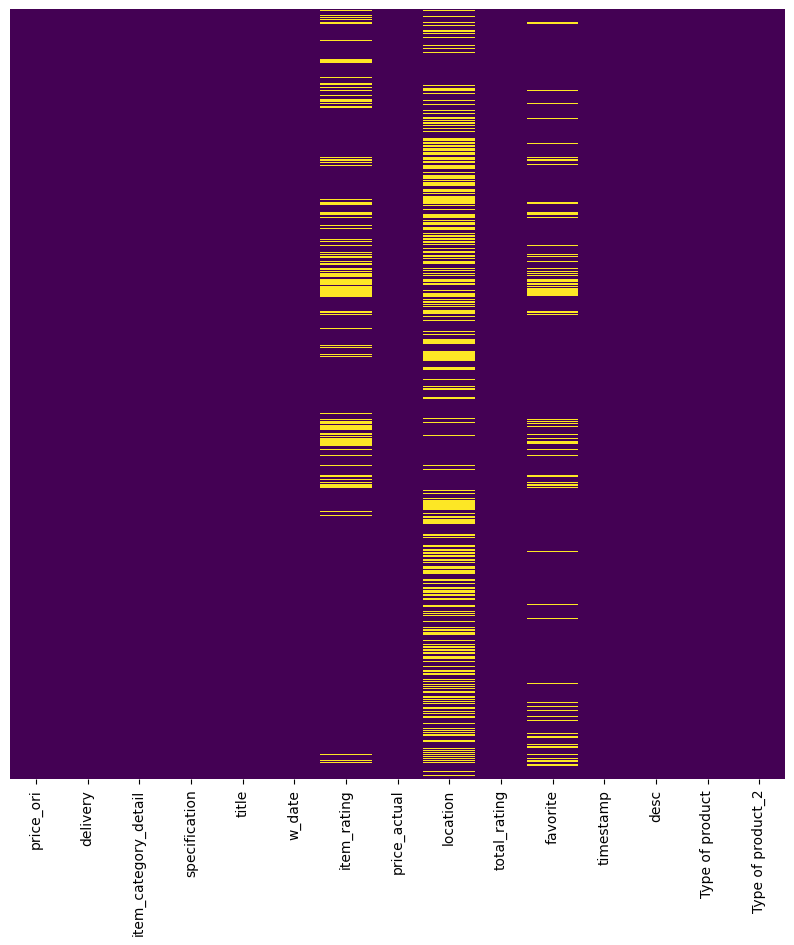

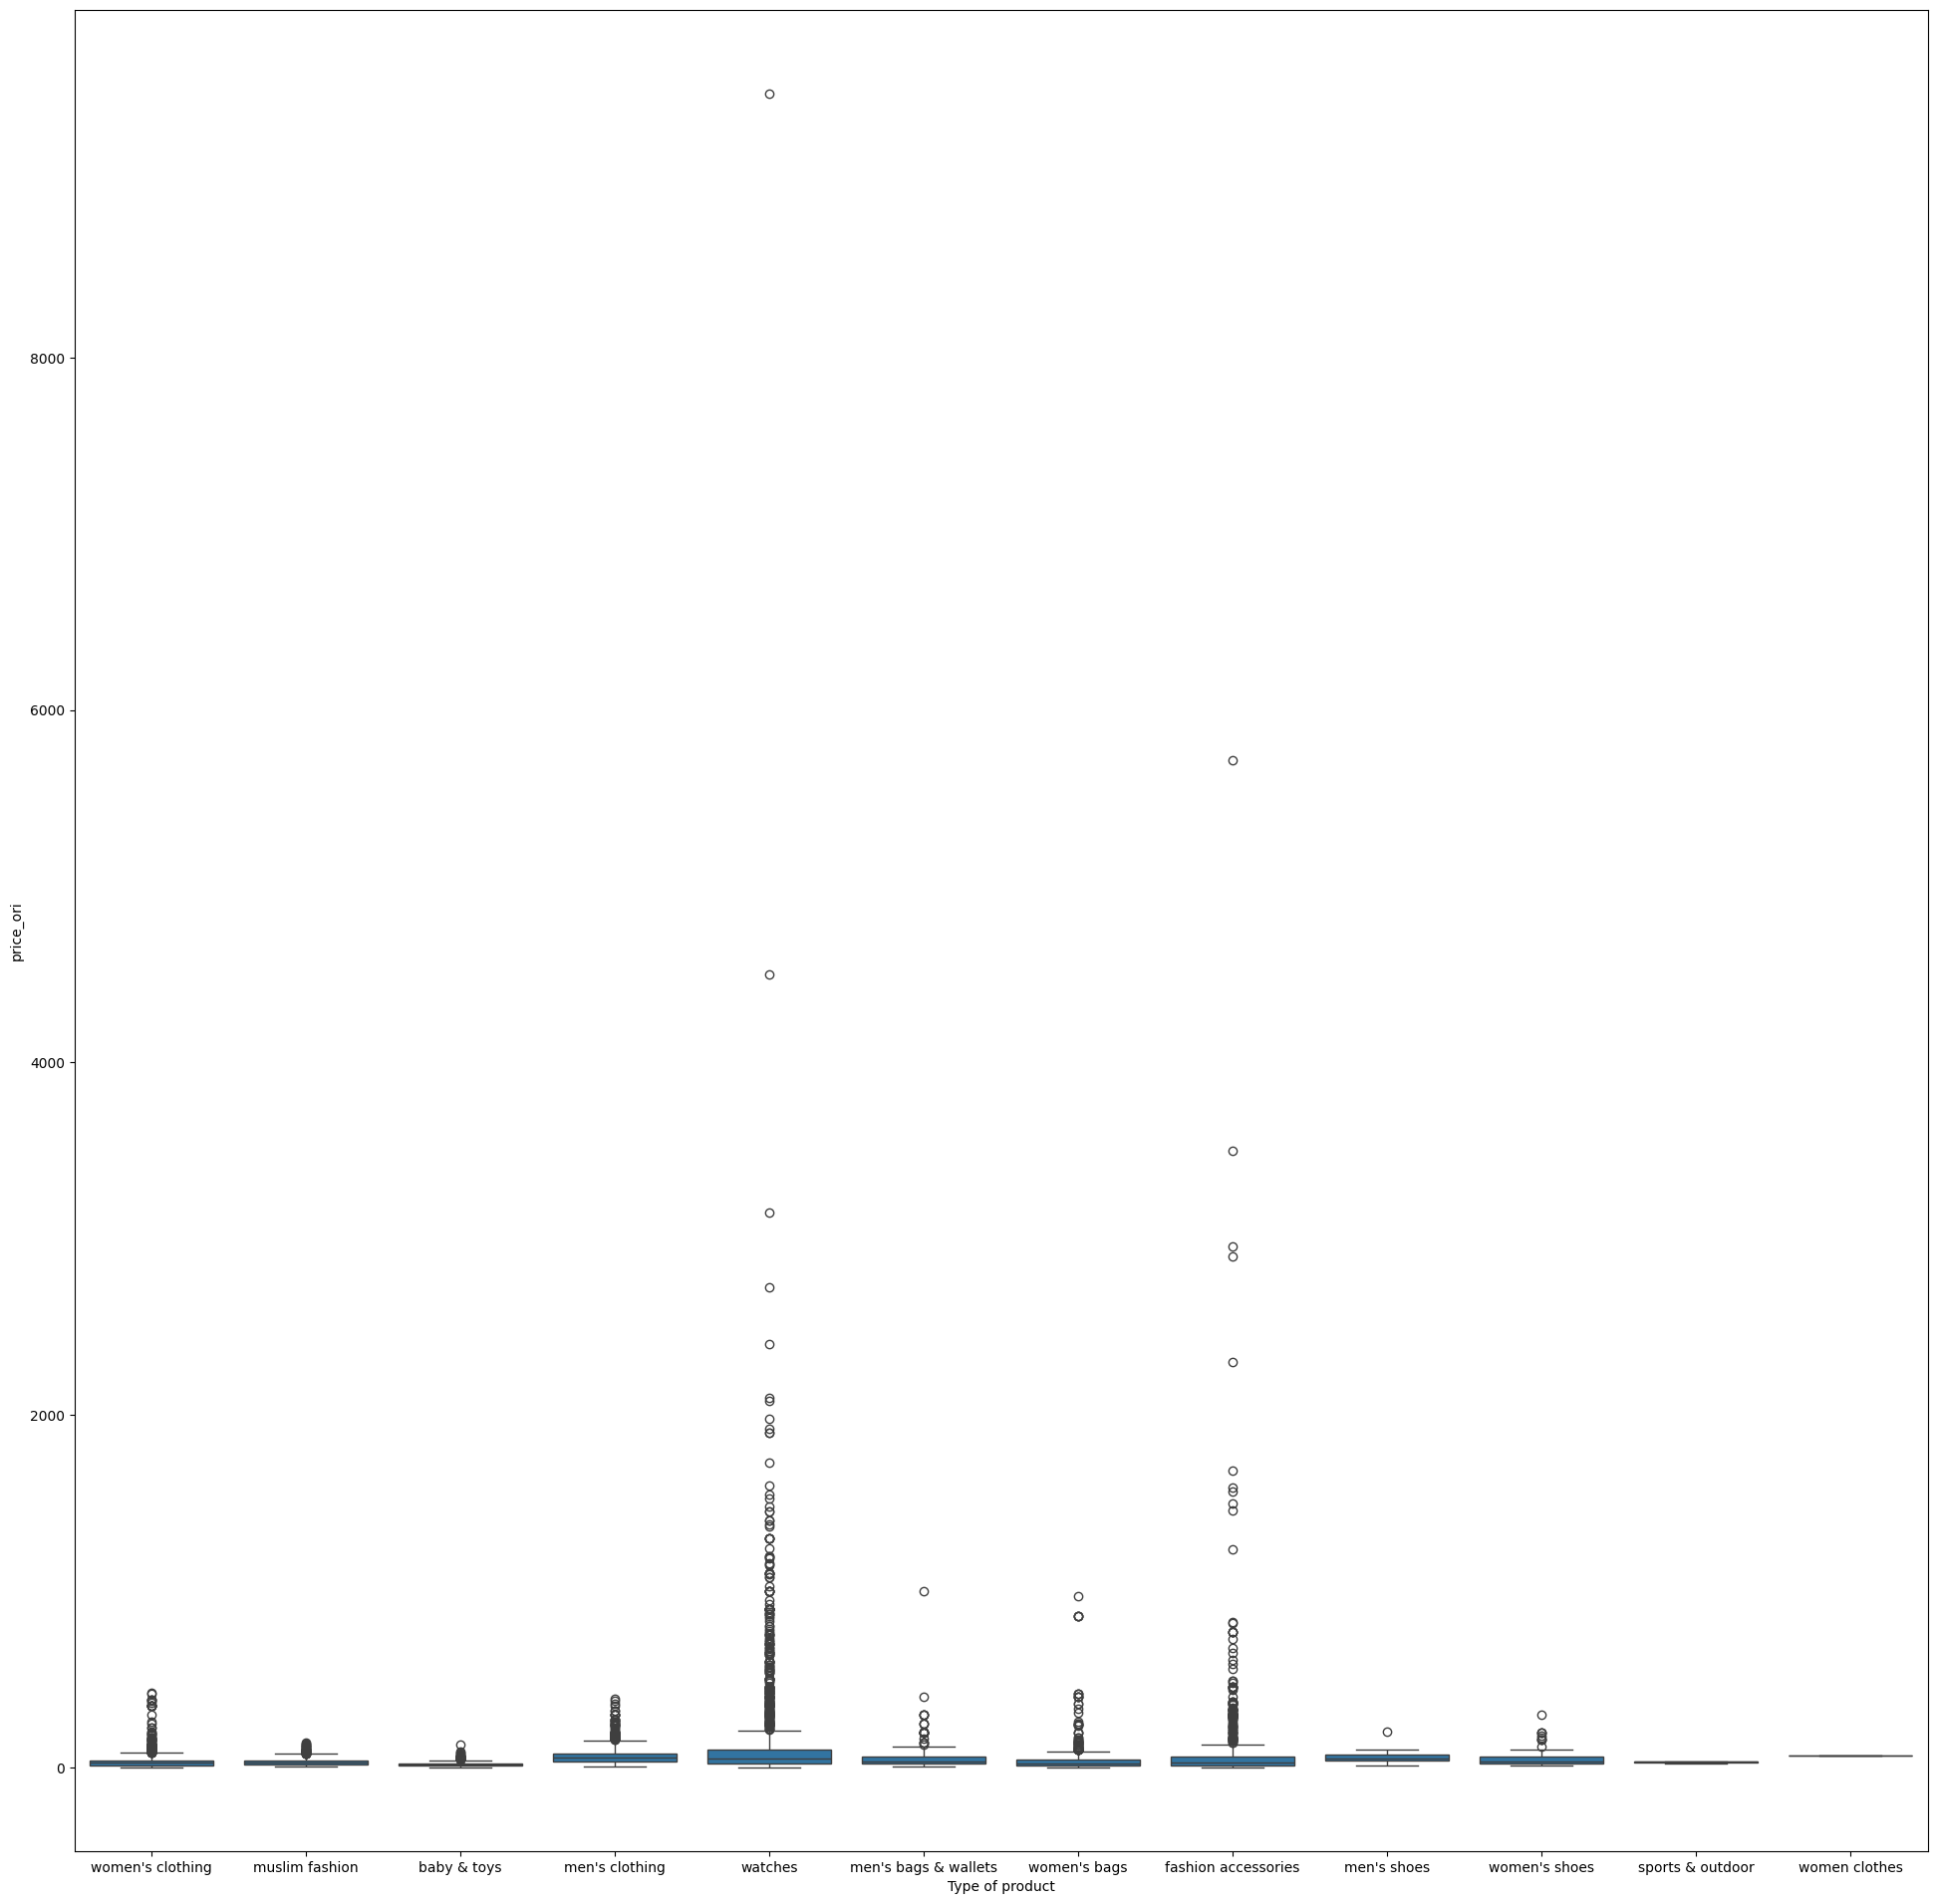

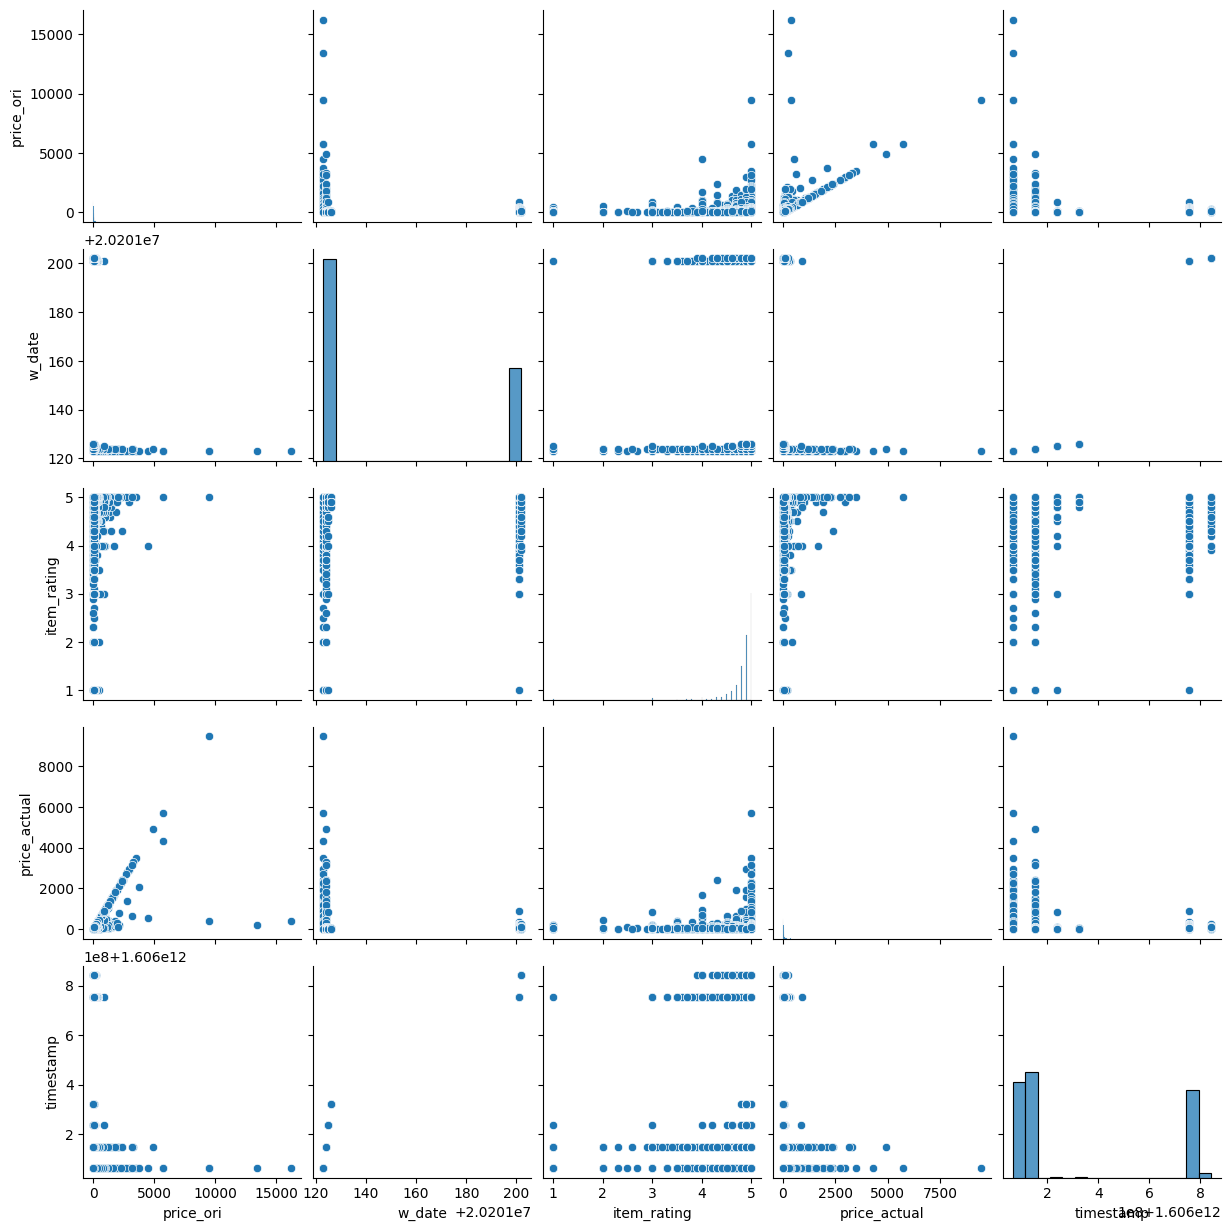

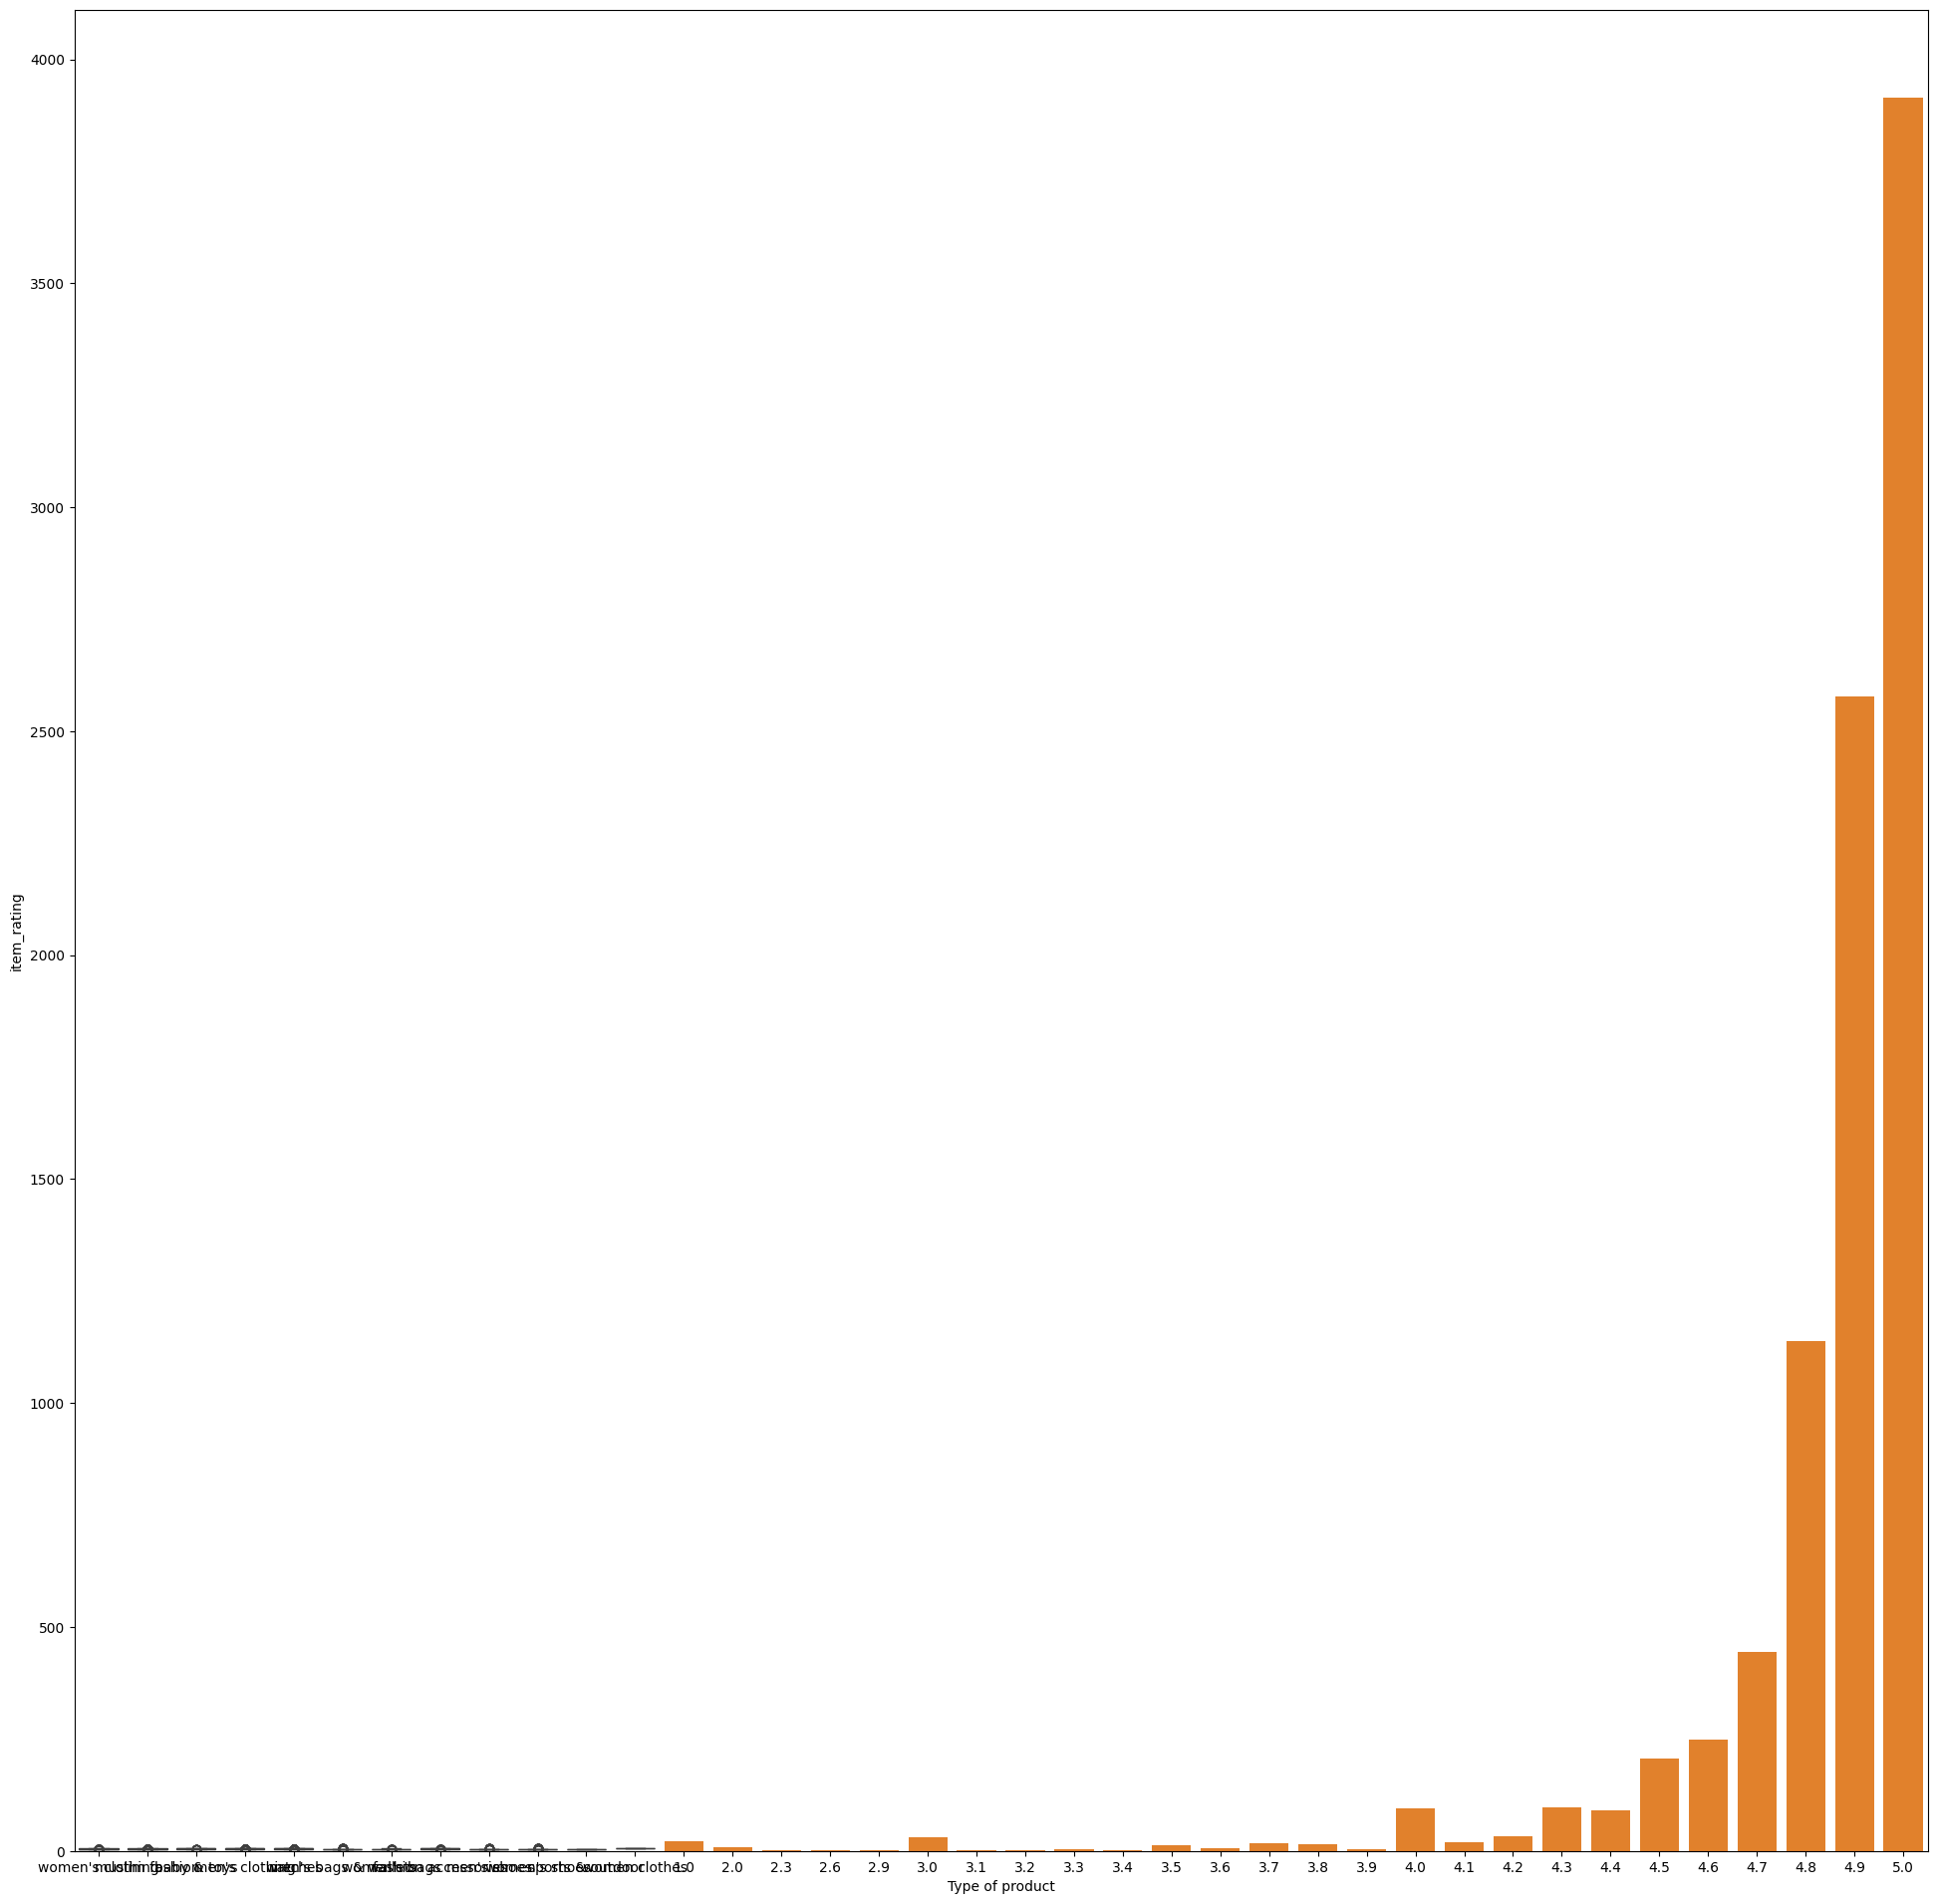

In [17]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(new_set.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.figure(figsize=(24,24))
sns.boxplot(x='Type of product',y='price_ori',data=new_set.dropna(inplace=False))

sns.pairplot(data=new_set)
plt.figure(figsize=(24,24))
sns.boxplot(x='Type of product',y='item_rating',data=new_set.dropna(inplace=False))
sns.countplot(data=new_set.dropna(inplace=False),x='item_rating')
px.histogram(new_set, x='item_rating', color='Type of product', barmode='overlay')


px.histogram(
    data_frame=new_set,
    x='price_actual'
    )

       price_ori                                           delivery  \
0          29.16  Shipping Pre-Order (ships in 11 days) Shipping...   
1          57.78  Shipping Free shipping Free shipping for order...   
2          82.00  Shipping Free shipping Shipping from overseas ...   
4          40.90  Shipping Free shipping Shipping from overseas ...   
5          37.00  Shipping Free shipping Shipping from overseas ...   
...          ...                                                ...   
17769      26.60  Shipping Free shipping Shipping from Mainland ...   
17770       6.00  Shipping Free shipping Shipping to KL City, Ku...   
17771      49.99  Shipping Free shipping Shipping to KL City, Ku...   
17772      32.00  Shipping Shipping from Mainland China to KL Ci...   
17774      80.00  Shipping Shipping to KL City, Kuala Lumpur shi...   

                                    item_category_detail  \
0                     [shopee, women's clothing, skirts]   
1      [shopee, women's clo

<Axes: xlabel='item_rating', ylabel='price_actual'>

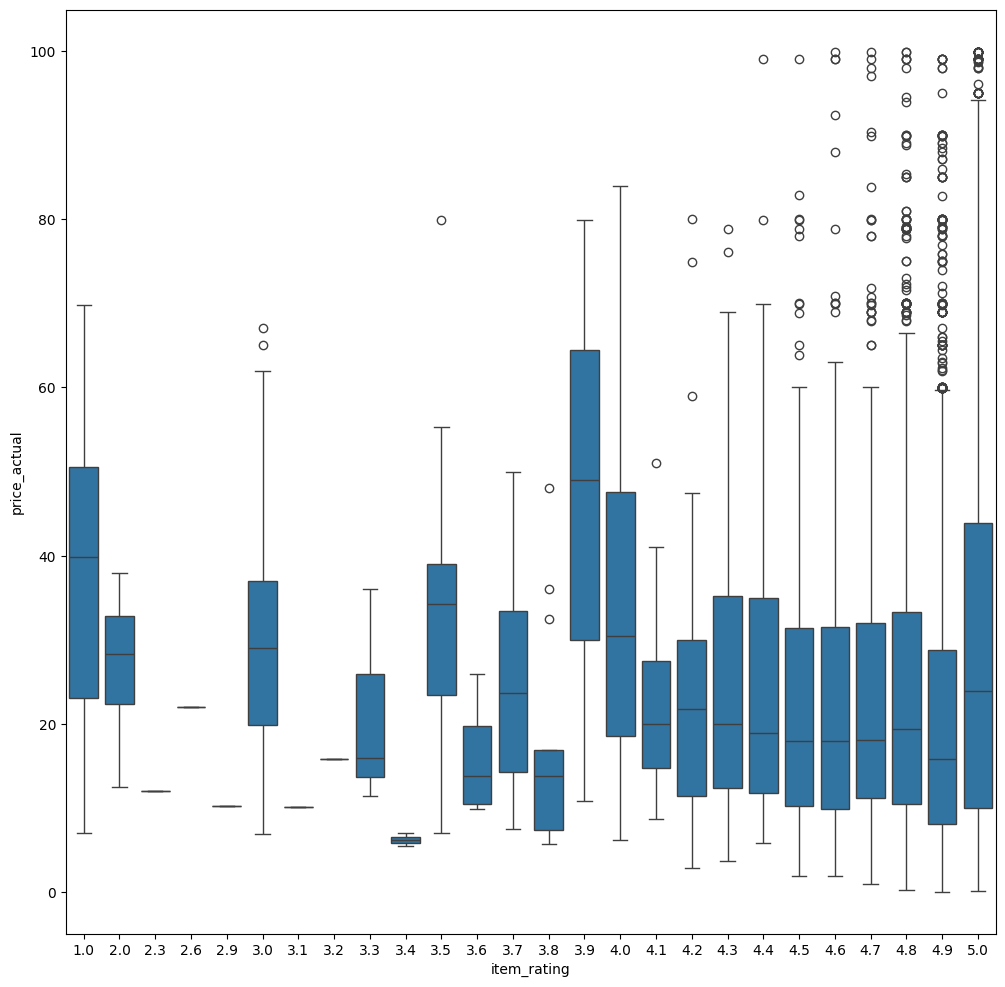

In [18]:
plt.figure(figsize=(12,12))
set_box=new_set[(new_set['price_actual']<100) ].copy()

print(set_box)
sns.boxplot(data=set_box.dropna(axis=0,inplace=False),x='item_rating', y='price_actual')

In [19]:
def rating_count(price_tag):
    if price_tag >=1000 :
        if ((price_tag <2500) and (price_tag >=1900) ):
            return 0.5*(5+4.9)
        else :
            return 5
    if ((price_tag<1000) and (price_tag >=100)):
        if (price_tag > 630) :
            return 5
        if ((price_tag < 630) and (price_tag >=390)):
            return 3
        if ((price_tag < 390) and (price_tag >=300)):
            return 3.5
        if ((price_tag <300) and (price_tag >=250)):
            return 4
        if ((price_tag < 250) and (price_tag >=200)):
            return 4.5
        if ((price_tag <200) and (price_tag >=100)):
            return 3.33
    else :
        if (price_tag >= 85) :
            return 4.7
        if(price_tag <85 and price_tag >= 50):
            return 3.9
        if (price_tag <50 and price_tag >=20):
            return 2
        if (price_tag < 20):
            return 4.7

            

In [20]:
new_set.loc[new_set['item_rating'].isna(), 'item_rating']=new_set.loc[new_set['item_rating'].isna(), 'price_actual'].apply(lambda row: rating_count(row))

In [21]:
import datetime
new_set['date_date']=new_set["w_date"].apply(lambda x: datetime.datetime.strptime(
    (str(int(x))[0:4]+'-'+str(int(x))[4:6]+'-'+str(int(x))[6:]),'%Y-%m-%d'
    ).date()
                                             )

<Axes: >

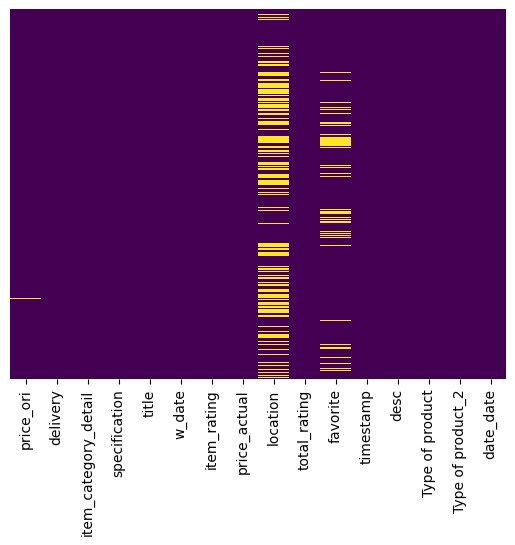

In [22]:
sns.heatmap(new_set.isnull(),cbar=False,cmap='viridis',yticklabels=False)


In [23]:
new_set=pd.read_csv('fashion_data_set.csv')
sns.heatmap(new_set.isnull(),cbar=False,cmap='viridis',yticklabels=False)


FileNotFoundError: [Errno 2] No such file or directory: 'fashion_data_set.csv'

In [ ]:
new_set.loc[new_set['price_ori'].isna(),'price_ori'] = new_set.loc[new_set['price_ori'].isna(),'price_actual']  

<Axes: >

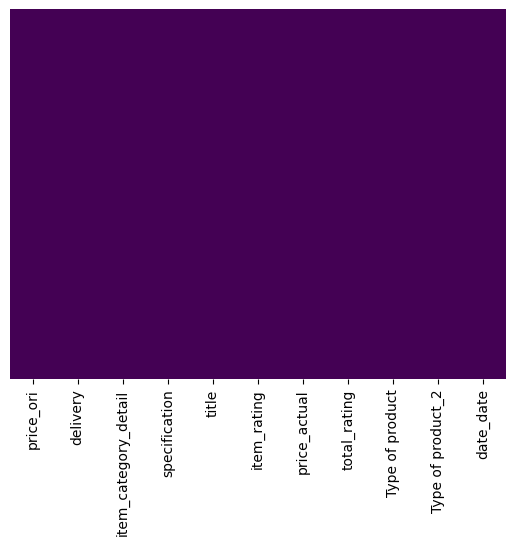

In [ ]:
sns.heatmap(new_set.isnull(),cbar=False,cmap='viridis',yticklabels=False)


NameError: name 'df' is not defined